In [0]:
# IMDBをカレントフォルダにダウンロード
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# 解凍
!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsupはラベル無しのため削除
!rm -rf aclImdb/train/unsup
# IMDBデータセットの説明を表示
!cat aclImdb/README

--2019-12-27 07:12:13--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  18.8MB/s    in 7.3s    

2019-12-27 07:12:25 (10.9 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an a

In [0]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [0]:

print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [0]:
print(y_train[0])

1


In [0]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
#token_patternてなに？

# print(vectorizer)
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
#countvectorizerによって一意の単語を抽出してベクトル化し、文章からカウントする

df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())

In [0]:
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [0]:
#n-gram
vectorizer = CountVectorizer(ngram_range=(2, 2),
                              token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


**問題１　BoWのスクラッチ実装**

In [0]:
import re
import numpy as np
class CountVectorizer_scratch:
  def __init__(self,n_gram_range, token_pattern):
    self.n_gram_range = np.arange(n_gram_range[0], n_gram_range[1] + 1)
    self.token_pattern = token_pattern
    self.feature_names = None

  def fit_transform(self,X):
    seq_list, word_list_unique = self.extract_unique(X)
    D = len(word_list_unique)
    N = len(seq_list)
    count_vec = np.zeros((N,D))
    for i, seq in enumerate(seq_list):
      for word in seq:
        for j, unique_word in enumerate(word_list_unique):
        
          if word == unique_word:
            count_vec[i, j] += 1
            break
    # print(count_vec)
    return count_vec


  def get_feature_names(self):
    return self.feature_names


  def extract_unique(self,X):
    # print(X)
    word_list_unique = []
    seq_list = []
    count = 0
    for seq in X:
      count += 1
      if count % 1000 == 0:
        print(count)

      
      # print('seq_before:', seq)
      match = re.findall(self.token_pattern, seq)
      seq = match
      #文章と
      seq = self.join_words(seq)
      seq_list.append(seq)
      # print('seq', seq)
      # seq = seq.replace(',', '')
      # seq = seq.replace('.', '')
      # word_list = seq.split()
      
      for word in seq:
        if word not in word_list_unique:
          word_list_unique.append(word)
    # print(word_list_unique)
    # print(seq_list)
    self.feature_names = word_list_unique
    return seq_list, word_list_unique

  def join_words(self, seq):
    #self.n_gram_rangeを使ってリsつお生成
    new_list = []
    for join_num in self.n_gram_range:
      for idx in range(len(seq) - join_num + 1):
        join_words = seq[idx: idx+join_num]
        joined_words = ' '.join(join_words)
        new_list.append(joined_words)

    # print('new_list', new_list)
    return new_list





In [0]:
test_dataset = ['This movie is SOOOO funny!!!',
                'What a movie! I never',
                'best movie ever!!!!! this movie']

range=(1,1)

In [0]:
vectorizer = CountVectorizer_scratch(n_gram_range=(1,1), token_pattern=r'(?u)\b\w+\b')
seq_list, word_list = vectorizer.extract_unique(test_dataset)
print(word_list)
print(seq_list)

['This', 'movie', 'is', 'SOOOO', 'funny', 'What', 'a', 'I', 'never', 'best', 'ever', 'this']
[['This', 'movie', 'is', 'SOOOO', 'funny'], ['What', 'a', 'movie', 'I', 'never'], ['best', 'movie', 'ever', 'this', 'movie']]


In [0]:
vec_count = vectorizer.fit_transform(test_dataset)

In [0]:
names = vectorizer.get_feature_names()

In [0]:
df_count = pd.DataFrame(vec_count, columns=names)
df_count

,This,movie,is,SOOOO,funny,What,a,I,never,best,ever,this
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


range=(1,2)

In [0]:
vectorizer = CountVectorizer_scratch(n_gram_range=(1,2), token_pattern=r'(?u)\b\w+\b')
seq_list, word_list = vectorizer.extract_unique(test_dataset)
print(word_list)
print(seq_list)

['This', 'movie', 'is', 'SOOOO', 'funny', 'This movie', 'movie is', 'is SOOOO', 'SOOOO funny', 'What', 'a', 'I', 'never', 'What a', 'a movie', 'movie I', 'I never', 'best', 'ever', 'this', 'best movie', 'movie ever', 'ever this', 'this movie']
[['This', 'movie', 'is', 'SOOOO', 'funny', 'This movie', 'movie is', 'is SOOOO', 'SOOOO funny'], ['What', 'a', 'movie', 'I', 'never', 'What a', 'a movie', 'movie I', 'I never'], ['best', 'movie', 'ever', 'this', 'movie', 'best movie', 'movie ever', 'ever this', 'this movie']]


In [0]:
vec_count = vectorizer.fit_transform(test_dataset)

In [0]:
names = vectorizer.get_feature_names()

In [0]:
df_count = pd.DataFrame(vec_count, columns=names)
df_count

,This,movie,is,SOOOO,funny,This movie,movie is,is SOOOO,SOOOO funny,What,a,I,never,What a,a movie,movie I,I never,best,ever,this,best movie,movie ever,ever this,this movie
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**TF-TDF**

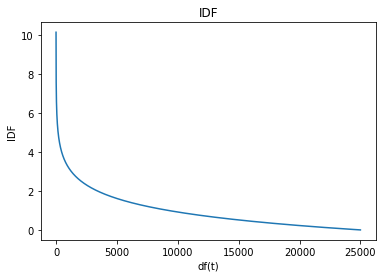

In [0]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

**ストップワード**

In [0]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [0]:
# はじめて使う場合はストップワードをダウンロード
import nltk
stop_words = nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',

In [0]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


**問題2 TF-IDFの計算**

In [0]:
print(len(x_train))
print(len(x_test))

25000
25000


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=5000, norm=None,
                             stop_words=stop_words)
X_tfidf = (tfidf_vect.fit_transform(x_train)).toarray()
print(X_tfidf.shape)

(25000, 5000)


In [0]:
# tfidf_vect_test = TfidfVectorizer(max_features=5000, norm=None,
#                              stop_words=stop_words)
X_tfidf_test = (tfidf_vect.transform(x_test)).toarray()
print(X_tfidf_test.shape)

(25000, 5000)


In [0]:
print(tfidf_vect.fit_transform(x_train).columns)
print(tfidf_vect.transform(x_test).columns)

AttributeError: ignored

In [0]:
print(X_tfidf)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         2.99867605 ... 0.         0.         0.        ]
 ...
 [0.         0.         2.99867605 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_tfidf, y_train)
y_pred = lr.predict(X_tfidf)
acc = 100 * np.sum(y_pred == y_train) / len(y_train)
print('acc: {}%'.format(acc))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


acc: 98.508%


In [0]:
y_pred_test = lr.predict(X_tfidf_test)
test_acc = 100 * np.sum(y_pred_test == y_test) / len(y_test)
print('test acc: {}%'.format(test_acc))

test acc: 81.232%


問題4 TF-IDFのスクラッチ実装は飛ばす

**word2vec**

In [0]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count =1, size=10)#次元数10に設定
model.build_vocab(sentences)
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter)
print(model.iter)
print('語彙の一覧：{}'.format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
  print('{}のベクトル：\n{}'.format(vocab, model.wv[vocab]))

5
語彙の一覧：dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル：
[-0.0010025   0.01999431  0.02751531 -0.00107607 -0.03349857 -0.00454144
  0.00063294  0.02443501  0.03643006 -0.01955207]
movieのベクトル：
[ 0.00074723 -0.02579218 -0.04698456  0.00862807 -0.02043231 -0.00794267
 -0.04186841  0.0297022  -0.03244543  0.00325901]
isのベクトル：
[ 0.04524045 -0.00718873  0.02680316 -0.04574241  0.04458739 -0.01765981
  0.03821329  0.00388128 -0.01555655  0.03848631]
veryのベクトル：
[ 0.02177621  0.02475979 -0.0475735  -0.03566532 -0.03146679 -0.03473793
  0.03405426 -0.00152452 -0.04557645 -0.00222252]
goodのベクトル：
[-0.02400905 -0.03078315 -0.02638613  0.02874267  0.01962665 -0.04378583
 -0.04747228  0.0362049  -0.01157705  0.03053508]
filmのベクトル：
[ 0.03401697  0.0097938   0.0360118  -0.00181816  0.03540172 -0.00313883
  0.01561709 -0.03845012 -0.04334164 -0.01231657]
aのベクトル：
[-0.04149898  0.03128581 -0.03284666  0.02432315 -0.01908466 -0.01793494
  0.01993496  0.0433045  -0.03752473 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


In [0]:
model.wv.most_similar(positive='good', topn=3)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('movie', 0.6816413998603821),
 ('a', 0.4211571514606476),
 ('very', -0.13605308532714844)]

可視化

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[[-0.0010025   0.01999431  0.02751531 -0.00107607 -0.03349857 -0.00454144
   0.00063294  0.02443501  0.03643006 -0.01955207]
 [ 0.00074723 -0.02579218 -0.04698456  0.00862807 -0.02043231 -0.00794267
  -0.04186841  0.0297022  -0.03244543  0.00325901]
 [ 0.04524045 -0.00718873  0.02680316 -0.04574241  0.04458739 -0.01765981
   0.03821329  0.00388128 -0.01555655  0.03848631]
 [ 0.02177621  0.02475979 -0.0475735  -0.03566532 -0.03146679 -0.03473793
   0.03405426 -0.00152452 -0.04557645 -0.00222252]
 [-0.02400905 -0.03078315 -0.02638613  0.02874267  0.01962665 -0.04378583
  -0.04747228  0.0362049  -0.01157705  0.03053508]
 [ 0.03401697  0.0097938   0.0360118  -0.00181816  0.03540172 -0.00313883
   0.01561709 -0.03845012 -0.04334164 -0.01231657]
 [-0.04149898  0.03128581 -0.03284666  0.02432315 -0.01908466 -0.01793494
   0.01993496  0.0433045  -0.03752473  0.03934107]
 [ 0.01009694 -0.02166682  0.02421461  0.02735564 -0.00021902  0.03945376
   0.00406605 -0.02123661  0.03406225  0.00389882]]

[]

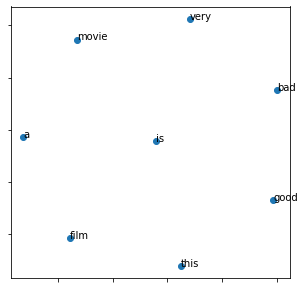

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=5000,
                  random_state=23)
print(model[vocabs])
vectors_tsne = tsne_model.fit_transform(model[vocabs])

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(vectors_tsne[:,0], vectors_tsne[:,1])
for i, word in enumerate(list(vocabs)):
  plt.annotate(word, xy=(vectors_tsne[i,0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])

**問題5 コーパスの前処理**

In [0]:
for i in range(len(x_train)):
  x_train[i] = x_train[i].lower()

In [0]:
print(x_train[0])

zero day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. it captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />it is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. in terms of explaining the motives and actions of the two young suicide/murderers it is better than 'elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />flawed but honest with a terrible honesty.


In [0]:
transformer = CountVectorizer_scratch(n_gram_range=(1,1),
                                      token_pattern=r'\b\w+\b')
seq_list, word_list_unique = transformer.extract_unique(x_train)
print(len(seq_list[0]))
print(len(word_list_unique[0]))


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
137
4


In [0]:
print(len(word_list_unique))

74891


In [0]:
print(seq_list[0])

['zero', 'day', 'leads', 'you', 'to', 'think', 'even', 're', 'think', 'why', 'two', 'boys', 'young', 'men', 'would', 'do', 'what', 'they', 'did', 'commit', 'mutual', 'suicide', 'via', 'slaughtering', 'their', 'classmates', 'it', 'captures', 'what', 'must', 'be', 'beyond', 'a', 'bizarre', 'mode', 'of', 'being', 'for', 'two', 'humans', 'who', 'have', 'decided', 'to', 'withdraw', 'from', 'common', 'civility', 'in', 'order', 'to', 'define', 'their', 'own', 'mutual', 'world', 'via', 'coupled', 'destruction', 'br', 'br', 'it', 'is', 'not', 'a', 'perfect', 'movie', 'but', 'given', 'what', 'money', 'time', 'the', 'filmmaker', 'and', 'actors', 'had', 'it', 'is', 'a', 'remarkable', 'product', 'in', 'terms', 'of', 'explaining', 'the', 'motives', 'and', 'actions', 'of', 'the', 'two', 'young', 'suicide', 'murderers', 'it', 'is', 'better', 'than', 'elephant', 'in', 'terms', 'of', 'being', 'a', 'film', 'that', 'gets', 'under', 'our', 'rationalistic', 'skin', 'it', 'is', 'a', 'far', 'far', 'better', '

**#問題６ Word2Vecの学習**

In [0]:
sentences = seq_list
model = Word2Vec(min_count=1, size=10)
model.build_vocab(sentences)
model.train(sentences, total_examples=model.corpus_count, epochs=1)

(4529852, 6056873)

In [0]:
print('語彙の一覧：{}'.format(model.wv.vocab.keys()))

語彙の一覧：dict_keys(['zero', 'day', 'leads', 'you', 'to', 'think', 'even', 're', 'why', 'two', 'boys', 'young', 'men', 'would', 'do', 'what', 'they', 'did', 'commit', 'mutual', 'suicide', 'via', 'slaughtering', 'their', 'classmates', 'it', 'captures', 'must', 'be', 'beyond', 'a', 'bizarre', 'mode', 'of', 'being', 'for', 'humans', 'who', 'have', 'decided', 'withdraw', 'from', 'common', 'civility', 'in', 'order', 'define', 'own', 'world', 'coupled', 'destruction', 'br', 'is', 'not', 'perfect', 'movie', 'but', 'given', 'money', 'time', 'the', 'filmmaker', 'and', 'actors', 'had', 'remarkable', 'product', 'terms', 'explaining', 'motives', 'actions', 'murderers', 'better', 'than', 'elephant', 'film', 'that', 'gets', 'under', 'our', 'rationalistic', 'skin', 'far', 'almost', 'anything', 'are', 'likely', 'see', 'flawed', 'honest', 'with', 'terrible', 'honesty', 'words', 'can', 't', 'describe', 'how', 'bad', 'this', 'i', 'explain', 'by', 'writing', 'only', 'too', 'yourself', 'get', 'at', 'grip', 'ho

In [0]:

for vocab in list(model.wv.vocab.keys())[:10]:
  print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))



zeroのベクトル : 
[-0.07017661  0.4149156   1.8632426  -0.02679751 -0.15019445 -0.1244141
  0.35214558  1.1931965  -0.55570656  0.5922062 ]
dayのベクトル : 
[ 0.41192737  0.5330363   2.860388    2.232192    1.3047974  -2.7847364
  0.8518604   2.5050507  -0.99579966 -1.321436  ]
leadsのベクトル : 
[ 0.1175356   0.90446156  2.7390518   1.5069876  -0.87644976 -1.2615268
  0.02263146 -0.15511754 -1.7479221   0.9032887 ]
youのベクトル : 
[ 2.4616437  -2.3132415   8.168896   -1.535663    9.195234   -0.37071243
  3.0425985   3.9985185   0.31502682  1.8905951 ]
toのベクトル : 
[ 0.1877131  -2.3091042   6.050852   -1.6721556   3.3066626   0.52896166
  1.3118545  -0.42876673 -1.2492635  -3.2581947 ]
thinkのベクトル : 
[-1.9116505   0.04233442  2.7927089   1.3883017   5.485349   -3.5781102
  4.805974    2.2435968  -3.095082    0.46006173]
evenのベクトル : 
[-0.5997707  -0.07855689  4.048611   -0.2593286   3.7253265  -0.47695726
  3.0606031   0.87731063 -1.9154528   1.7987024 ]
reのベクトル : 
[ 1.580922   3.1948519  4.584089  -1.240516

**問題7 ベクトルの可視化**

In [0]:
print(model.wv.most_similar(positive='good', topn=3))
print(model.wv.most_similar(positive='you', topn=3))
print(model.wv.most_similar(positive='why', topn=3))

[('funny', 0.9899673461914062), ('boring', 0.981157660484314), ('bad', 0.9808051586151123)]
[('vexation', 0.9448127746582031), ('we', 0.9423795938491821), ('quixotic', 0.9193703532218933)]
[('how', 0.9711524248123169), ('what', 0.9541294574737549), ('that', 0.9539008736610413)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


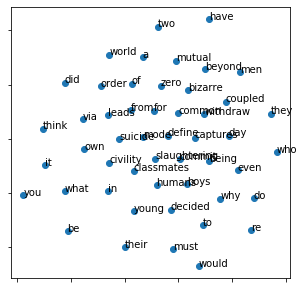

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocabs = list(model.wv.vocab.keys())[:50]

tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()